In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


## Initializing

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Spin Operators
Spin_X = 1/2 * sigmax()
Spin_Y = 1/2 * sigmay()
Spin_Z = 1/2 * sigmaz()
Spin_E = qeye(2)

#4x4 Tensors
ID = tensor(Spin_E, Spin_E)

IX = tensor(Spin_X, Spin_E)
IY = tensor(Spin_Y, Spin_E)
IZ = tensor(Spin_Z, Spin_E)

SX = tensor(Spin_E, Spin_X)
SY = tensor(Spin_E, Spin_Y)
SZ = tensor(Spin_E, Spin_Z)

#J-coupling evolution
IZSZ = tensor(Spin_Z, Spin_Z)

#Thermal/Initial State of the system
rho = Qobj([[5,0,0,0],
            [0,3,0,0],
            [0,0,-3,0],
            [0,0,0,-5]], dims = [[2,2], [2,2]])

np.set_printoptions(precision = 4)

In [4]:
def R(tensor, angle):
  '''
  Exponentiates the tensor to a rotation pulse of an angle
  '''
  rotation = (tensor*(-1j*angle)).expm()
  return rotation

def SpectraPlotter(rho, gate):
  '''
  Plots the expected spectrum from the elements of the transformed
  density matrix
  '''
  final = gate * rho * gate.dag()
  final = np.matrix(final)

  p2 = final[1,1]-final[3,3] #b-d
  p1 = final[0,0]-final[2,2] #a-c
  c2 = final[2,2]-final[3,3] #c-d
  c1 = final[0,0]-final[1,1] #a-b

  x = ['1H_2', '1H_1', '13C_2', '13C_1']
  y = [p2, p1, c2, c1]
  return plt.bar(x, y, align = 'center')

The phases are replaced with the numbers \
$+x = 0$ \
$+y = 1$ \
$-x = 2$ \
$-y = 3$


## X Gate
$X_1 = I_X\left(\pi\right)$ \
$X_2 = S_X\left(\pi\right)$ \
$X^{\otimes 2} = \left(I_X + S_X\right)\left(\pi\right)$ 

Pulse Program for $X_1$
```
pulse(1, a90H, 0, d180H)
delay(0.25)
```
Pulse Program for $X_2$
```
pulse(2, a90C, 0, d180C)
delay(0.25)
```
Pulse Program for $X^{\otimes 2}$
```
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13C, d180C)
delay(0.25)
```

In [5]:
#Expected Matrices
X = Qobj([[0,1],
          [1,0]])
X_1 = tensor (X, Spin_E)
X_2 = tensor(Spin_E, X)
X_both = tensor(X, X)

BitFlip Function for all three cases

In [6]:
def BitFlip(qubit):
  '''
  Applies BitFlip Sequence depending on the qubit no.
  '''
  if qubit == 'H':
    #Flips only Hydrogen Spins
    return R(IX, np.pi)

  if qubit == 'C':
    #Flips only Carbon Spins
    return R(SX, np.pi)

  if qubit == 'both':
    #Flips both Spins
    return R(IX+SX, np.pi)

  else:
    print ('Please provide valid qubit')

Simulation of $X_1$

In [7]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for BitFlip:')
print ('----------------------------------------------------------------------')
print (X_1)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for BitFlip on Hydrogen:')
print ('----------------------------------------------------------------------')
print (np.exp(1j*np.pi/2)*BitFlip('H'))

----------------------------------------------------------------------
This is the Expected Given Matrix for BitFlip:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
----------------------------------------------------------------------
This is the Simulated Matrix for BitFlip on Hydrogen:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


Simulation of $X_2$

In [8]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for BitFlip:')
print ('----------------------------------------------------------------------')
print (X_2)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for BitFlip on Carbon:')
print ('----------------------------------------------------------------------')
print (np.exp(1j*np.pi/2)*BitFlip('C'))

----------------------------------------------------------------------
This is the Expected Given Matrix for BitFlip:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
----------------------------------------------------------------------
This is the Simulated Matrix for BitFlip on Carbon:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Simulation of $X^{\otimes 2}$

In [9]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for BitFlip:')
print ('----------------------------------------------------------------------')
print (X_both)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for BitFlip for both qubits:')
print ('----------------------------------------------------------------------')
print (np.exp(1j*np.pi)*BitFlip('both'))

----------------------------------------------------------------------
This is the Expected Given Matrix for BitFlip:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
----------------------------------------------------------------------
This is the Simulated Matrix for BitFlip for both qubits:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


## Hadamard Gate

$H_1 = I_X (\pi) I_Y \left(\frac{\pi}{2}\right)$ \
$H_2 = S_X (\pi) S_Y \left(\frac{\pi}{2}\right)$ \
$H^{\otimes 2} = H_1 + H_2 = \left(I_X+S_Y\right) (\pi) \left(I_Y + S_Y\right) \left(\frac{\pi}{2}\right) $

Pulse Sequence for $H_1$ 
```
pulse(1, a90H, 0, d180H)
delay(0.25)
pulse(1, a90H, 1, d90H)
delay(0.25)
```
Pulse Sequence for $H_2$
```
pulse(2, a90C, 0, d180C)
delay(0.25)
pulse(2, a90C, 1, d180C)
delay(0.25)
```
Pulse Sequence for $H^{\otimes 2}$
```
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)
```

In [10]:
#Expected Matrices
H = 1/np.sqrt(2)*Qobj([[-1j,-1j],
                      [-1j,1j]])
H_1 = tensor (H, Spin_E)
H_2 = tensor(Spin_E, H)
H_both = tensor(H, H)

Hadamard Function for all three cases

In [11]:
def Hadamard(qubit):
  '''
  Applies Hadamard Sequence depending on the qubit
  '''
  if qubit == 'H':
    #Hadamards Hydrogen spins
    return R(IX, np.pi) * R(IY, np.pi/2)

  if qubit == 'C':
    #Hadamards Carbon spins
    return R(SX, np.pi) * R(SY, np.pi/2)

  if qubit == 'both':
    #Hadamards both spins
    return R(IX+SX, np.pi) * R(IY+SY, np.pi/2)

Simulation of $H_1$

In [12]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for Hadamard:')
print ('----------------------------------------------------------------------')
print (np.sqrt(2)*H_1)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for Hadamard on Hydrogen:')
print ('----------------------------------------------------------------------')
print (np.sqrt(2)*Hadamard('H'))

----------------------------------------------------------------------
This is the Expected Given Matrix for Hadamard:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.-1.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+1.j]]
----------------------------------------------------------------------
This is the Simulated Matrix for Hadamard on Hydrogen:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.-1.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+1.j]]


Simulation of $H_2$

In [13]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for Hadamard:')
print ('----------------------------------------------------------------------')
print (np.sqrt(2)*H_2)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for Hadamard on Carbon:')
print ('----------------------------------------------------------------------')
print (np.sqrt(2)*Hadamard('C'))

----------------------------------------------------------------------
This is the Expected Given Matrix for Hadamard:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.-1.j 0.-1.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+1.j]]
----------------------------------------------------------------------
This is the Simulated Matrix for Hadamard on Carbon:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.-1.j 0.-1.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+1.j]]


Simulation of $H^{\otimes 2}$

In [14]:
print ('----------------------------------------------------------------------')
print ('This is the Expected Given Matrix for Hadamard:')
print ('----------------------------------------------------------------------')
print (2*H_both)
print ('----------------------------------------------------------------------')
print ('This is the Simulated Matrix for Hadamard on both:')
print ('----------------------------------------------------------------------')
print (2*Hadamard('both'))

----------------------------------------------------------------------
This is the Expected Given Matrix for Hadamard:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1. -1. -1. -1.]
 [-1.  1. -1.  1.]
 [-1. -1.  1.  1.]
 [-1.  1.  1. -1.]]
----------------------------------------------------------------------
This is the Simulated Matrix for Hadamard on both:
----------------------------------------------------------------------
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1. -1. -1. -1.]
 [-1.  1. -1.  1.]
 [-1. -1.  1.  1.]
 [-1.  1.  1. -1.]]


## Controlled-Z Gate

$CZ = I_{z} \left(\frac{\pi}{2}\right) S_{z} \left(\frac{\pi}{2}\right) 2I_ZS_Z\left(\frac{-\pi}{2}\right)$ \
$CZ = I_X\left(\frac{-\pi}{2}\right)I_Y\left(\frac{\pi}{2}\right)I_X\left(\frac{\pi}{2}\right) \ -> \ S_X\left(-\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right)S_X\left(\frac{\pi}{2}\right) \ - > \ I_ZS_Z\left(\pi\right)$

Pulse Sequence for Controlled-Z in NMR
```
pulse(1, a90H, 2, d90H) #Composite R(IZ) pulse
delay(0.25)
pulse(1, a90H, 1, d90H)
delay(0.25)
pulse(1, a90H, 0, d90H)
delay(0.25)

pulse(2, a90C, 2, d90C) #Composite R(SZ) Pulse
delay(0.25)
pulse(2, a90C, 1, d90C)
delay(0.25)
pulse(2, a90C, 0, d90C)

delay(dEvolution)
```

In [94]:
def CZ(qubit):
  '''
  The function implements the exact matrix and implements
  the composite case for NMR simulation
  '''
  if qubit == 'exact':
    #Exact pulse, un-implementable on NMR
    return R(IZ, np.pi/2) * R(SZ, np.pi/2) * R(IZSZ, -np.pi)
  if qubit == 'composite':
    #Pulse, implementable on NMR
    return R(IX, -np.pi/2)*R(IY, np.pi/2)*R(IX, np.pi/2) * R(SX, -np.pi/2)*R(SY, np.pi/2)*R(SX, np.pi/2) * R(IZSZ, np.pi)

CZ with the IZ pulses non-native to NMR system

In [16]:
print (np.exp(1j*np.pi/4)*CZ('exact'))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


CZ with the composite pulses

In [96]:
print (np.exp(-1j*np.pi/4)*CZ('composite'))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


However, the different pulses sequences result in the same changes to the thermal state spectrum

/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


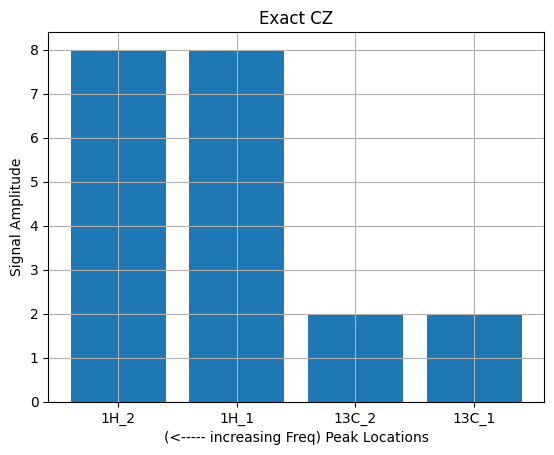

In [97]:
SpectraPlotter(rho, CZ('exact'))
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.ylabel('Signal Amplitude')
plt.title('Exact CZ')
plt.grid(True)
plt.show()

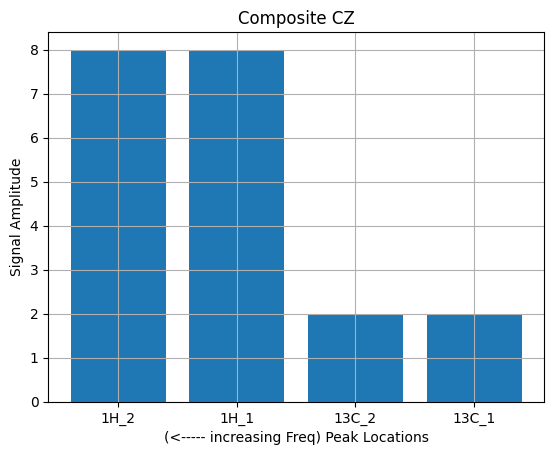

In [98]:
SpectraPlotter(rho, CZ('composite'))
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.ylabel('Signal Amplitude')
plt.title('Composite CZ')
plt.grid(True)
plt.show()

## Controlled NOT gate

$CNOT = e^{\frac{i\pi}{4}}S_Z\left(\frac{-\pi}{2}\right)S_X\left(\frac{\pi}{2}\right)2I_ZS_Z \left(\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right)I_Z\left(\frac{\pi}{2}\right)$ \
$CNOT = e^{\frac{i\pi}{4}} S_X\left(\frac{-\pi}{2}\right)S_Y\left(\frac{-\pi}{2}\right)S_X\left(\frac{\pi}{2}\right)\ -> \ S_X\left(\frac{\pi}{2}\right)2I_ZS_Z \left(\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right) \ -> \ I_X\left(-\frac{\pi}{2}\right)I_Y\left(\frac{\pi}{2}\right)I_X\left(\frac{\pi}{2}\right) $

Pulse Sequence for Controlled NOT gate on NMR
```
pulse(2, a90C, 2, d90C) #Composite R(SZ) Pulse
delay(0.25)
pulse(2, a90C, 3, d90C)
delay(0.25)
pulse(2, a90C, 0, d90C)
delay(0.25)

pulse(2, a90C, 0, d90C) #Evolution under J-coupling
delay(dEvolution)
pulse(2, a90C, 1, d90C)
delay(0.25)

pulse(1, a90H, 2, d90H) #Composite R(IZ) pulse
delay(0.25)
pulse(1, a90H, 1, d90H)
delay(0.25)
pulse(1, d90H, 0, d90H)
delay(0.25)
```


In [75]:
def R_IZ(angle):
  #Composite Pulse for a non-native IZ pulse
  return R(-IX, np.pi/2)*R(IY, angle)*R(IX, np.pi/2)

def R_SZ(angle):
  #Composite Pulse for a non-native SZ pulse
  return R(-SX, np.pi/2)*R(SY, angle)*R(SX, np.pi/2)

In [102]:
def CNOT(qubit):
  if qubit == 'exact':
    #Exact but un-implementable pulse in NMR
    return (R(SZ,-np.pi/2) * R(SX, np.pi/2) * R(IZSZ, np.pi) * R(SY, np.pi/2) * R(IZ,np.pi/2))
  if qubit == 'composite':
    #Composite and implementable pulse using CNOT_appx
    return (R_SZ(-np.pi/2) * R(SX, np.pi/2) * R(IZSZ, np.pi) * R(SY, np.pi/2) * R_IZ(np.pi/2))
  if qubit == 'cz':
    #Composite pulse using Hadamard and CZ
    return Hadamard('C') * CZ('composite') * Hadamard('C')

CNOT gate constructed with composite pulses of IZ, SZ and CNOT_appx

In [103]:
print (np.exp(1j*np.pi/4)*CNOT('composite'))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]


CNOT gate constructed with CZ and Hadamards

In [101]:
print (np.exp(-1j*np.pi/4)*CNOT('cz'))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1.  0.]]


However, the different pulses sequences result in the same changes to the thermal state spectrum

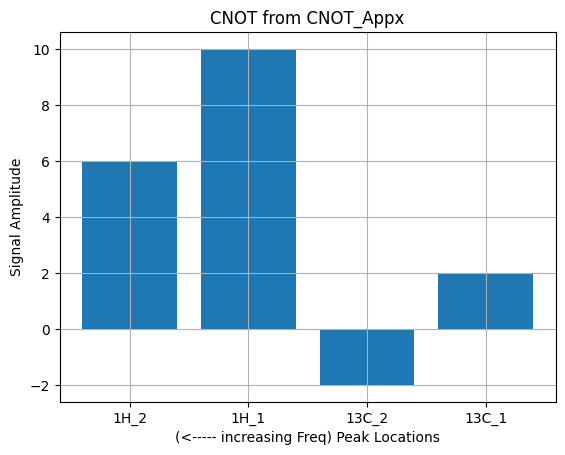

In [104]:
SpectraPlotter(rho, CNOT('composite'))
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.ylabel('Signal Amplitude')
plt.title('CNOT from CNOT_Appx')
plt.grid(True)
plt.show()

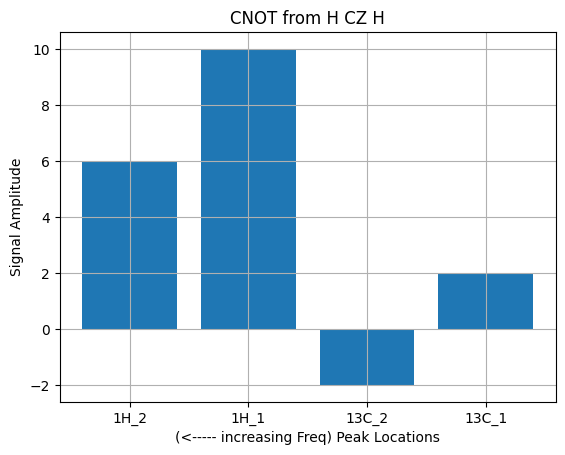

In [105]:
SpectraPlotter(rho, CNOT('cz'))
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.ylabel('Signal Amplitude')
plt.title('CNOT from H CZ H')
plt.grid(True)
plt.show()

## Temporal Averaging

Permutation Operators \
$P_1 = S_X\left(\frac{\pi}{2}\right)I_ZS_Z \left(\frac{\pi}{2}\right) \left(S_Y+I_X\right)\left(\frac{\pi}{2}\right)I_ZS_Z \left(\frac{\pi}{2}\right)I_Y\left(\frac{\pi}{2}\right)$ \
$P_2 = I_X\left(\frac{\pi}{2}\right)I_ZS_Z \left(\frac{\pi}{2}\right) \left(S_X+I_Y\right)\left(\frac{\pi}{2}\right)I_ZS_Z \left(\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right)$ \
$P_0 = I^{(4)} $

Pulse Sequence for $P_1$
```
pulse(1, a90H, 0, d90H)
delay(dEvolution)
pulse(1, a90HC, 1, freq1H, 2, a90C, 0, freq13C, d90C)
delay(dEvolution)
pulse(2, a90C, 1, d90C)
delay(0.25)
```
Pulse Sequence for $P_2$
```
pulse(2, a90C, 0, d90C)
delay(dEvolution)
pulse(1, a90HC, 0, freq1H, 2, a90C, 1, freq13C, d90C)
delay(dEvolution)
pulse(1, a90H, 1, d90H)
delay(0.25)
```

In [26]:
def Permutation(P):
  '''
  Three permutation operations
  P2 = adjoint of P1
  '''
  if P == '0':
    #P0 is Identity
    return ID
  if P == '1':
    return R(SX, np.pi/2) * R(IZSZ, np.pi) * R(SY+IX, np.pi/2) * R(IZSZ, np.pi) * R(IY, np.pi/2)
  if P == '2':
    #P2 is adjoint of P1
    return R(IX, np.pi/2) * R(IZSZ, np.pi) * R(SX+IY, np.pi/2) * R(IZSZ, np.pi) * R(SY, np.pi/2)

def MultPlot(rho, Gates, plot = False):
  '''
  Plotting for in-between stages for trouble-shooting
  '''
  sim = (Gates[0]*Gates[1]*Gates[2])*rho*(Gates[0]*Gates[1]*Gates[2]).dag()
  if plot == True:
    return SpectraPlotter(rho, (Gates[0]*Gates[1]*Gates[2]))
  if plot == False:
    return sim

def TempAvg(rho, Gate1, Gate2):
  '''
  Algorithm testing in Gate1
  State preparation as Gate2
  and then Temporal Averaging process
  '''
  P0 = Permutation('0')
  P1 = Permutation('1')
  P2 = Permutation('2')

  rho0 = MultPlot(rho, [Gate1, Gate2, P0], False)
  rho1 = MultPlot(rho, [Gate1, Gate2, P1], False)
  rho2 = MultPlot(rho, [Gate1, Gate2, P2], False)
  avg = (rho0 + rho1 + rho2)/3 + 5/3 * ID
  return avg

## State Preparation for DJ and Grover's

$|01\rangle$ prepared using Temporal Averaging

In [71]:
rho_01 = TempAvg(rho, ID, BitFlip('C'))
print(rho_01)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     6.6667 0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


$|00\rangle$ prepared using Temporal Averaging

In [72]:
rho_00 = TempAvg(rho, ID, ID)
print(rho_00)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[6.6667 0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


## Classical and Quantum Circuits

$f_1 = 0$

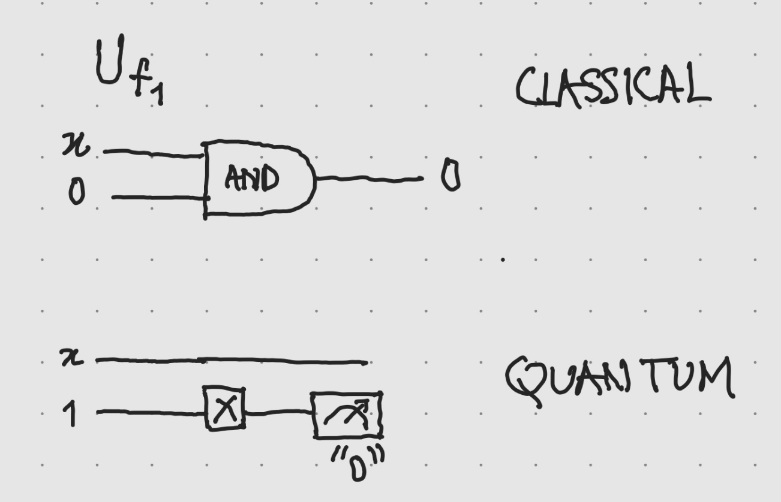

$f_2 = 1$

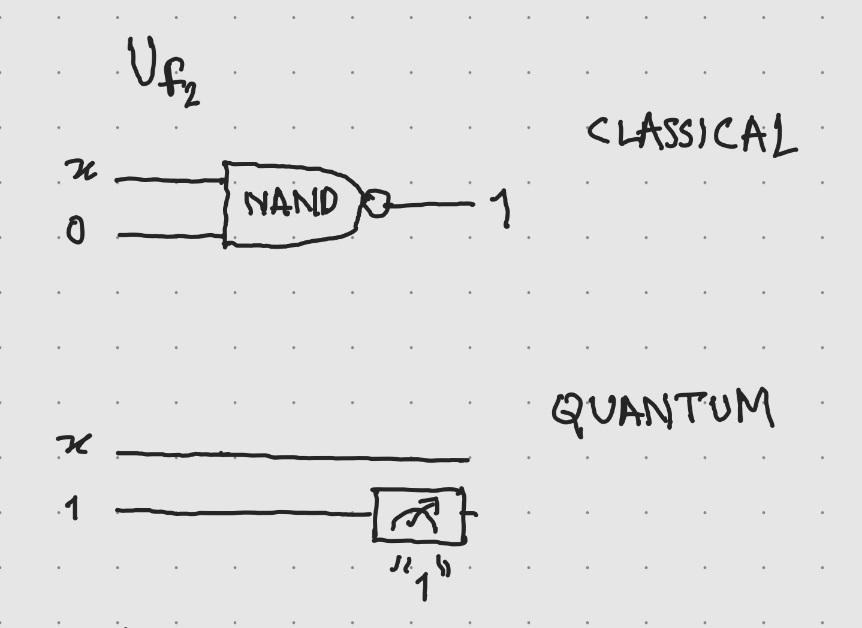

$f_3 = x$

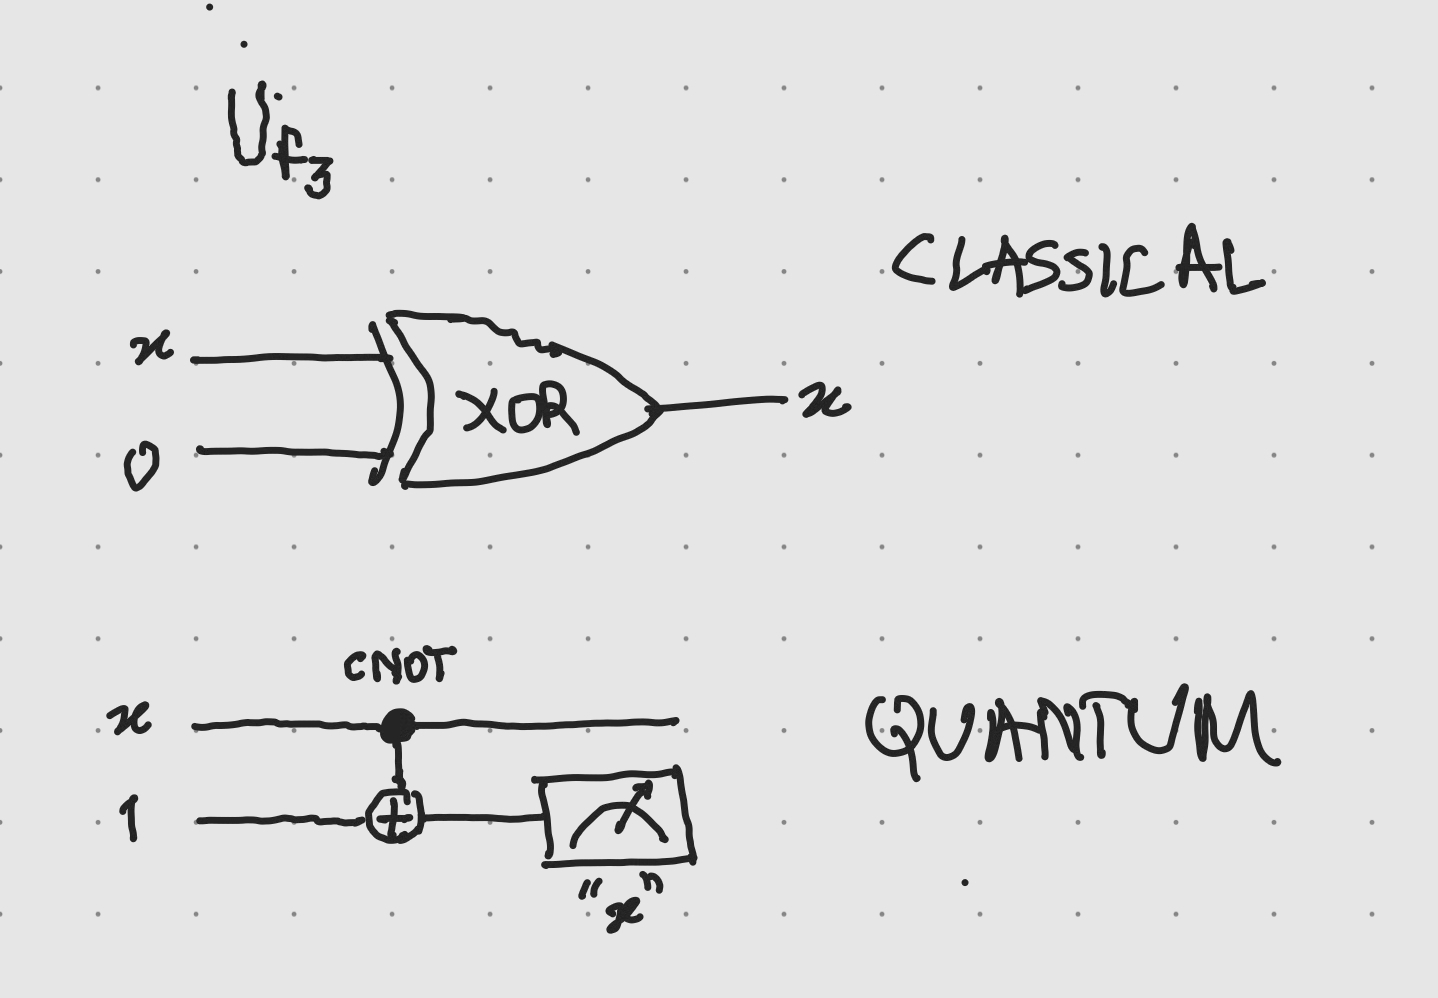

$f_4 = 1 - x$

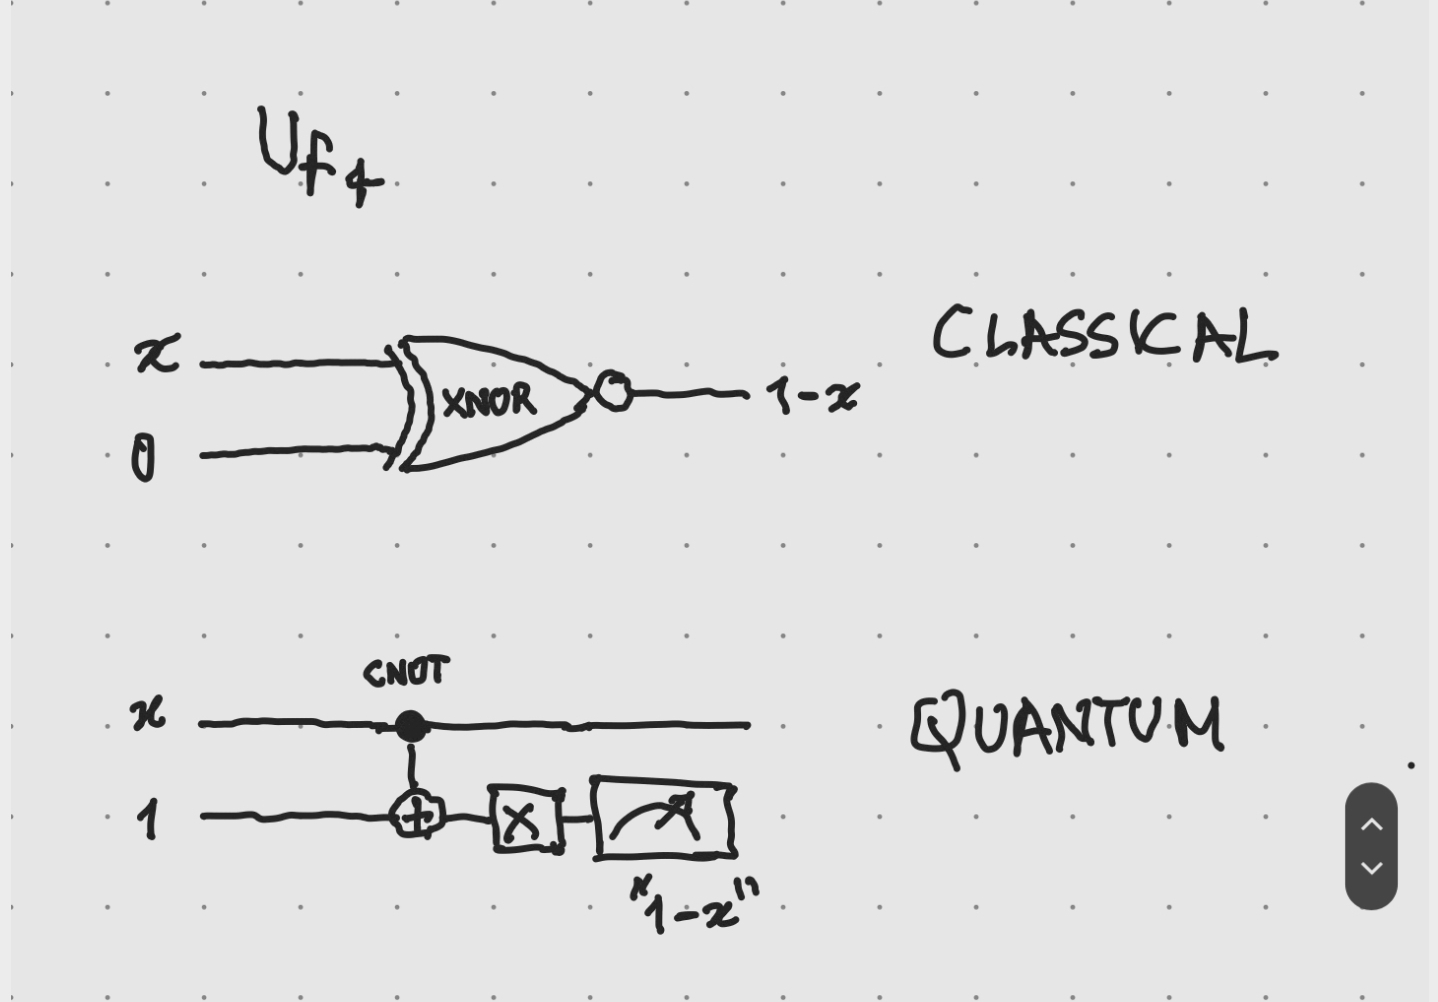

In [29]:
def Oracle (func):
  if func == '1':
    return ID
  if func == '2':
    return BitFlip('C')
  if func == '3':
    return CNOT('composite')
  if func == '4':
    return CNOT('composite') * BitFlip('C')

Doing EXACT Hadamard instead of PSUEDO-Hadamard for accurate Hermitian Oracles

In [30]:
print (Hadamard('C') * Oracle('1') * Hadamard('C')) #U_f1
print (np.exp(-1j*np.pi/2)*Hadamard('C') * Oracle('2') * Hadamard('C')) #U_f2
print (np.exp(1j*np.pi/4)*Hadamard('C') * Oracle('3') * Hadamard('C')) #U_f3
print (np.exp(-1j*np.pi/4)*Hadamard('C') * Oracle('4') * Hadamard('C')) #U_f4

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0. -1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0. -1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1.  0.]]


## Deutsch-Jozsa Algorithm

### General Sequence to apply DJ algorithm

There are four oracles, for four functions, with two each for constant and balanced function cases. Therefore, there are four implementations of the DJ algorithm. Additionally, a pre-sequence needs to precede the algorithm because the state of the NMR system cannot be intialized to the states we want.

However, we can do three experiments for each implementation of the DJ algorithm to help us to temporal averaging post processing. The following is the general pulse sequence design for all implementations of DJ algorithm

$\textbf{Constant Function f(0) = f(1) = 0}$ \
$U_{k_1} = \mathbb{1}^{\otimes 2}$ \
$P0 \ H^{\otimes 2} \mathbb{1}^{\otimes 2} H^{\dagger \otimes 2}$ \
$P1 \ H^{\otimes 2}\mathbb{1}^{\otimes 2}H^{\dagger \otimes 2}$ \
$P2 \ H^{\otimes 2}\mathbb{1}^{\otimes 2} H^{\dagger \otimes 2}$ 

$\textbf{Constant Function f(0) = f(1) = 1}$ \
$U_{k_1} = X_2$ \
$P0 \ H^{\otimes 2}X_2H^{\dagger \otimes 2}$ \
$P1 \ H^{\otimes 2}X_2H^{\dagger \otimes 2}$ \
$P2 \ H^{\otimes 2}X_2H^{\dagger \otimes 2}$ 

$\textbf{Balanced Function f(0) = 0 and f(1) = 1}$ \
$U_{k_2} = CNOT$ \
$P0 \ H^{\otimes 2} CNOT \ H^{\dagger \otimes 2}$ \
$P1 \ H^{\otimes 2} CNOT \ H^{\dagger \otimes 2}$ \
$P2 \ H^{\otimes 2} CNOT \ H^{\dagger \otimes 2}$ 

$\textbf{Balanced Function f(0) = 1 and f(1) = 0}$ \
$U_{k_3} = CNOT \ X_2$ \
$P0 \ H^{\otimes 2} CNOT \ X_2 H^{\dagger \otimes 2}$ \
$P1 \ H^{\otimes 2} CNOT \ X_2 H^{\dagger \otimes 2}$ \
$P2 \ H^{\otimes 2} CNOT \ X_2 H^{\dagger \otimes 2}$

Constant Function f(0) = f(1) = 0

$U_{k_1} = ID = \mathbb{1}$

Constant Function f(0) = f(1) = 1

$U_{k_2} = X_2 = S_X\left(\pi\right)$

Balanced Function f(0) = 0, f(1) = 1

$U_{k_3} = CNOT = S_X\left(\frac{-\pi}{2}\right)S_Y\left(\frac{-\pi}{2}\right)S_X\left(\frac{\pi}{2}\right) S_X\left(\frac{\pi}{2}\right)2I_ZS_Z \left(\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right) I_X\left(\frac{-\pi}{2}\right)I_Y\left(\frac{\pi}{2}\right)I_X\left(\frac{\pi}{2}\right)$

Balanced Function f(0) = 1, f(1) = 0

$U_{k_4} = CNOT \ X_2 = S_X\left(\frac{-\pi}{2}\right)S_Y\left(\frac{-\pi}{2}\right)S_X\left(\frac{\pi}{2}\right) S_X\left(\frac{\pi}{2}\right)2I_ZS_Z \left(\frac{\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right) I_X\left(\frac{-\pi}{2}\right)I_Y\left(\frac{\pi}{2}\right)I_X\left(\frac{\pi}{2}\right)S_X\left(\pi\right)$

In [31]:
def DJ(oracle):
  if oracle == '1':
    return Hadamard('both') * Oracle ('1') * Hadamard('both')
  if oracle == '2':
    return Hadamard('both') * Oracle ('2') * Hadamard('both')
  if oracle == '3':
    return Hadamard('both') * Oracle ('3') * Hadamard('both')
  if oracle == '4':
    return Hadamard('both') * Oracle ('4') * Hadamard('both')

Constant Deutsch-Jozsa Algorithms

$DJ_{const}|01\rangle$  = $|01\rangle$

In [79]:
print (TempAvg(rho, DJ('1'), BitFlip('C')))
print (TempAvg(rho, DJ('2'), BitFlip('C')))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     6.6667 0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     6.6667 0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


Balanced Deutsch-Jozsa Algorithms

$DJ_{bal}|01\rangle$  = $|11\rangle$

In [80]:
print (TempAvg(rho, DJ('3'), BitFlip('C')))
print (TempAvg(rho, DJ('4'), BitFlip('C')))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[6.6667 0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[6.6667 0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


To conclude, as expected, the temporally average initial state of $|01\rangle$ will produce the identical for both constant Deutsch-Jozsa oracles and identical spectrums for both balanced Deutsch-Jozsa oracles

## Grover's Algorithm

Oracles $\left(Z_f\right)$ for Grover's Algorithm

$P = I_Y\left(\frac{\pi}{2}\right)I_X\left(\frac{-\pi}{2}\right)I_Y\left(\frac{-\pi}{2}\right)S_Y\left(\frac{\pi}{2}\right)S_X\left(\frac{-\pi}{2}\right)S_Y\left(\frac{-\pi}{2}\right)I_ZS_Z\left(\frac{\pi}{2}\right)$
$Z_0 = X^{\otimes 2} CZ \ X^{\otimes 2}$ \
$Z_1 = X_1 CZ \ X_1$ \
$Z_2 = X_2 CZ \ X_2$ \
$Z_3 = CZ$


In [119]:
def GOracle(state):
  if state == '0': #XYX and XYX
    return R(IX, np.pi/2)*R(IY, np.pi/2)*R(IX, -np.pi/2)*R(SX, np.pi/2)*R(SY, np.pi/2)*R(SX, -np.pi/2)*R(IZSZ, np.pi)
  if state == '1': #Negative angle only on SZ
    return R(IY, np.pi/2)*R(IX, np.pi/2)*R(IY, -np.pi/2)*R(SY, np.pi/2)*R(SX, -np.pi/2)*R(SY, -np.pi/2)*R(IZSZ, np.pi)
  if state == '2': #Negative Angle only on IZ
    return R(IY, np.pi/2)*R(IX, -np.pi/2)*R(IY, -np.pi/2)*R(SY, np.pi/2)*R(SX, np.pi/2)*R(SY, -np.pi/2)*R(IZSZ, np.pi)
  if state == '3': #No Negative Angle on IZ or SZ
    return R(IY, np.pi/2)*R(IX, np.pi/2)*R(IY, -np.pi/2)*R(SY, np.pi/2)*R(SX, np.pi/2)*R(SY, -np.pi/2)*R(IZSZ, np.pi)
  if state == 'Z0':#XYX and XYX
    return R(IX, np.pi/2)*R(IY, np.pi/2)*R(IX, -np.pi/2)*R(SX, np.pi/2)*R(SY, np.pi/2)*R(SX, -np.pi/2)*R(IZSZ, np.pi)

In [123]:
Z0 = GOracle('Z0')
print (-np.exp(-1j*np.pi/4)*Z0)
Z1 = GOracle('1')
print (-np.exp(1j*np.pi/4)*Z1)
Z2 = GOracle('2')
print (-np.exp(1j*np.pi/4)*Z2)
Z3 = GOracle('3')
print (-np.exp(-1j*np.pi/4)*Z3)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]


### General Sequence to apply Grover's algorithm


$G = H^{\otimes 2} Z_0 H^{\otimes 2} Z_fH^{\otimes 2}$ \
$|x_k\rangle = G|00\rangle $

In [124]:
def Grover(oracle):
  Z0 = GOracle('Z0')
  if oracle == '0':
    return Hadamard('both') * GOracle('Z0') * Hadamard('both') * (GOracle('0')) * Hadamard('both')
  if oracle == '1':
    return Hadamard('both') * GOracle('Z0') * Hadamard('both') * (GOracle('1')) * Hadamard('both')
  if oracle == '2':
    return Hadamard('both') * GOracle('Z0') * Hadamard('both') * (GOracle('2')) * Hadamard('both')
  if oracle == '3':
    return Hadamard('both') * GOracle('Z0') * Hadamard('both') * (GOracle('3')) * Hadamard('both')

$x = 0$, \
$G|00\rangle = |00\rangle $

In [125]:
print (TempAvg(rho, Grover('0'), ID))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[6.6667 0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


$x = 1$, \
$G|00\rangle = |01\rangle $

In [126]:
print (TempAvg(rho, Grover('1'), ID))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     6.6667 0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]


$x = 2$, \
$G|00\rangle = |10\rangle$

In [127]:
print (TempAvg(rho, Grover('2'), ID))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     6.6667 0.    ]
 [0.     0.     0.     0.    ]]


$x = 3$, \
$G|00\rangle = |11\rangle$

In [128]:
print (TempAvg(rho, Grover('3'), ID))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     6.6667]]


To conclude, as expected, the Grover's circuit upon singular application will prepare the marked state $\left(x_k\right)$ as required from the temporally averaged initial state of $|00\rangle$

## Testing Each Stage of Deutsch-Jozsa

In [41]:
P0 = Permutation('0')
P1 = Permutation('1')
P2 = Permutation('2')

### Constant Oracle 1
Pulse Sequence for the DJ Algorithm Alone
```
#State Prep
pulse(2, a90C, 0, d180C)

#Hadamard 
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)

#Identity (Oracle)

#Hadamard
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)
```

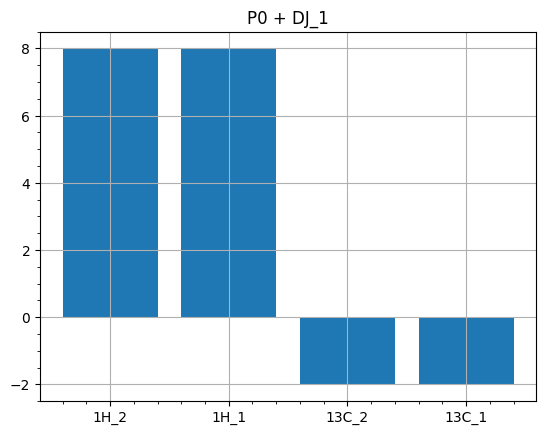

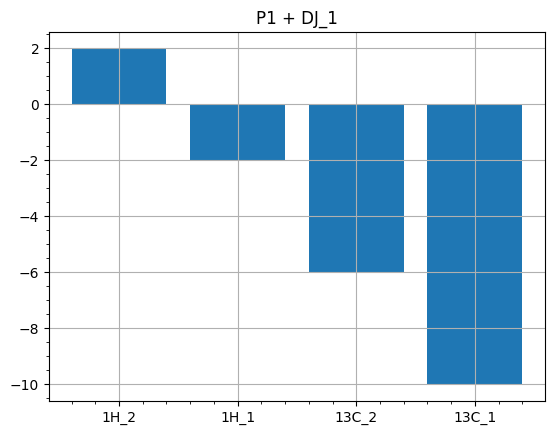

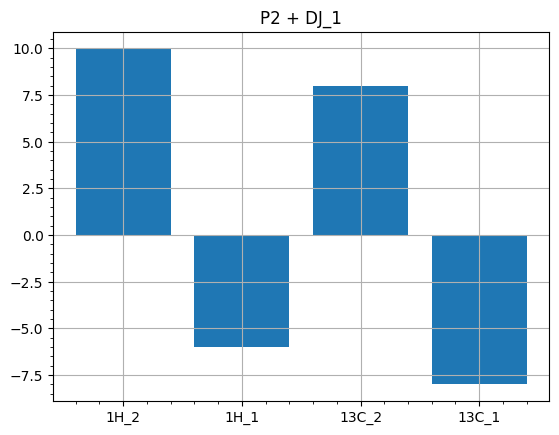

In [42]:
MultPlot(rho, [DJ('1'), BitFlip('C'), P0], True)
plt.grid(True)
plt.title('P0 + DJ_1')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('1'), BitFlip('C'), P1], True)
plt.grid(True)
plt.title('P1 + DJ_1')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('1'), BitFlip('C'), P2], True)
plt.grid(True)
plt.title('P2 + DJ_1')
plt.minorticks_on()
plt.show()


### Constant Oracle 2
Pulse Sequence for the DJ Algorithm Alone
```
#State Preparation
pulse(2, a90C, 0, d180C)

#Hadamard 
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)

#Carbon BitFlip (Oracle)
pulse(2, a90C, 0, d180C)
delay(0.25)

#Hadamard
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)
```

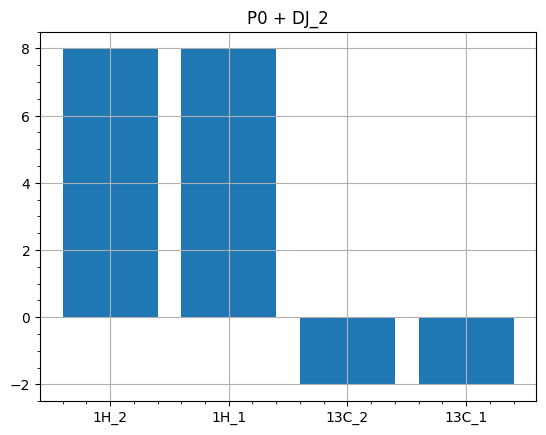

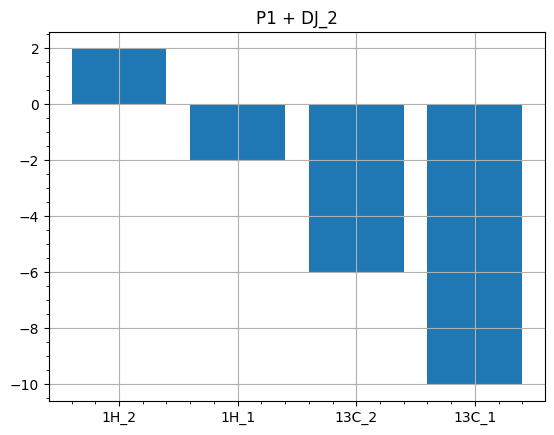

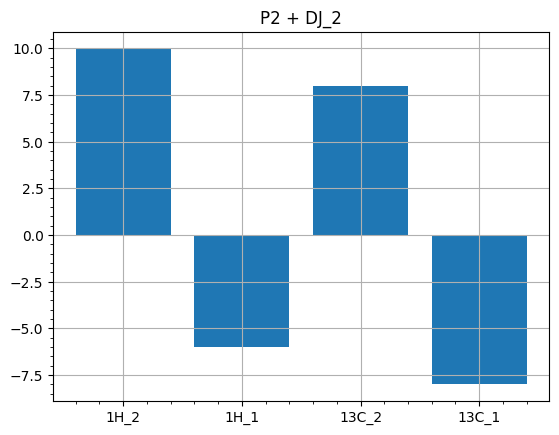

In [43]:
MultPlot(rho, [DJ('2'), BitFlip('C'), P0], True)
plt.grid(True)
plt.title('P0 + DJ_2')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('2'), BitFlip('C'), P1], True)
plt.grid(True)
plt.title('P1 + DJ_2')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('2'), BitFlip('C'), P2], True)
plt.grid(True)
plt.title('P2 + DJ_2')
plt.minorticks_on()
plt.show()

### Balanced Function 1
```
#State Prep
pulse(2, a90C, 0, d180C)

#Hadamard 
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)

#Oracle
CNOT or whatever

#Hadamard
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)
```

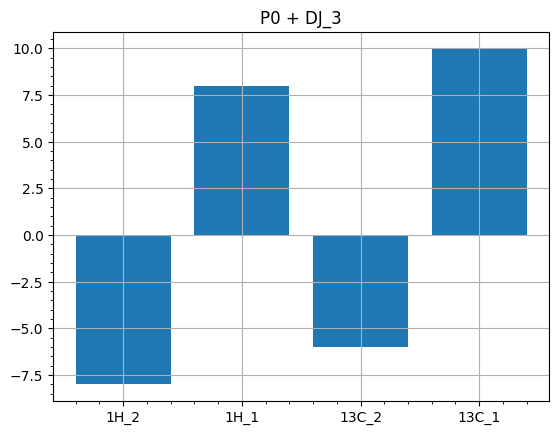

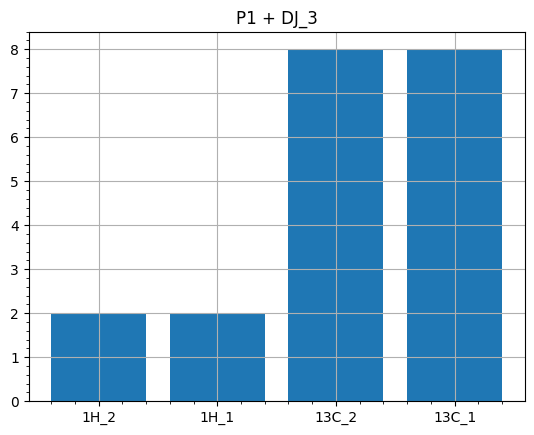

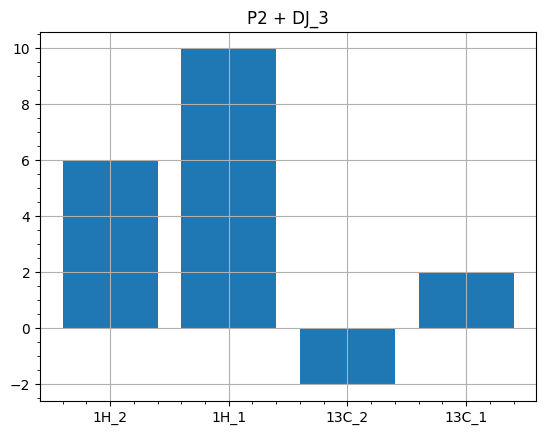

In [44]:
MultPlot(rho, [DJ('3'), BitFlip('C'), P0], True)
plt.grid(True)
plt.title('P0 + DJ_3')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('3'), BitFlip('C'), P1], True)
plt.grid(True)
plt.title('P1 + DJ_3')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('3'), BitFlip('C'), P2], True)
plt.grid(True)
plt.title('P2 + DJ_3')
plt.minorticks_on()
plt.show()

### Balanced Function 2
```
#State Prep
pulse(2, a90C, 0, d180C)

#Hadamard 
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)

#Oracle
CNOT or whatever
delay and then this
pulse(2, a90C, 0, d180C)

#Hadamard
pulse(1, a90HC, 0, freq1H, 2, a90C, 0, freq13, d180C)
delay(0.25)
pulse(1, a90HC, 1, freq1H, 2, a90C, 1, freq13, d90C)
delay(0.25)
```

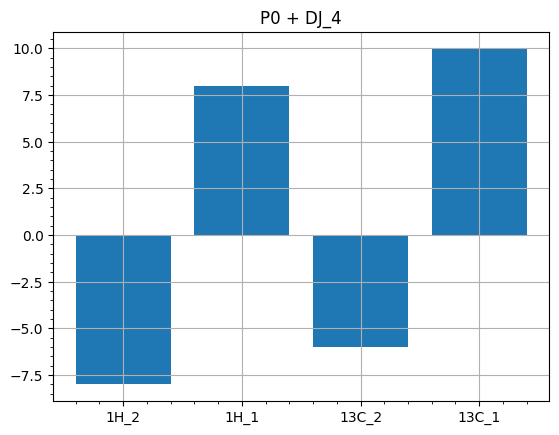

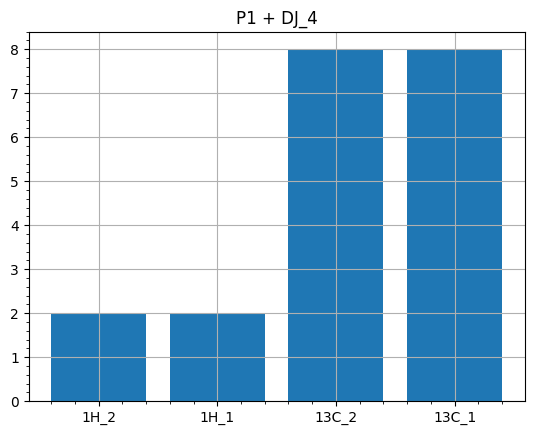

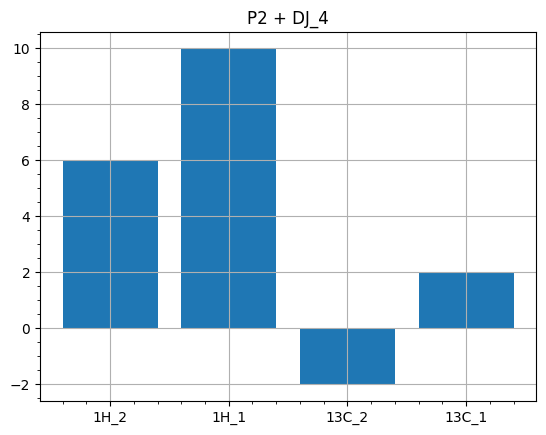

In [45]:
MultPlot(rho, [DJ('4'), BitFlip('C'), P0], True)
plt.grid(True)
plt.title('P0 + DJ_4')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('4'), BitFlip('C'), P1], True)
plt.grid(True)
plt.title('P1 + DJ_4')
plt.minorticks_on()
plt.show()
MultPlot(rho, [DJ('4'), BitFlip('C'), P2], True)
plt.grid(True)
plt.title('P2 + DJ_4')
plt.minorticks_on()
plt.show()

## Testing Grover's at each stage

/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


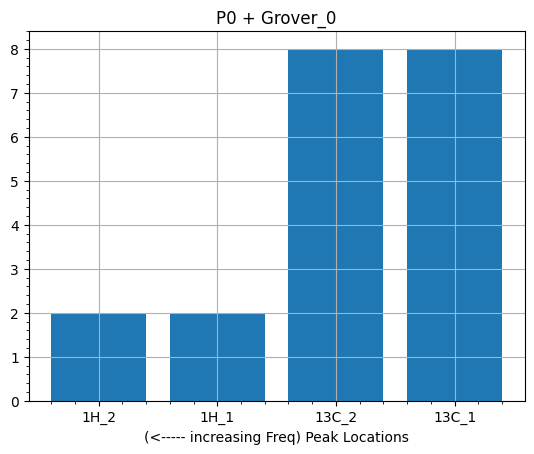

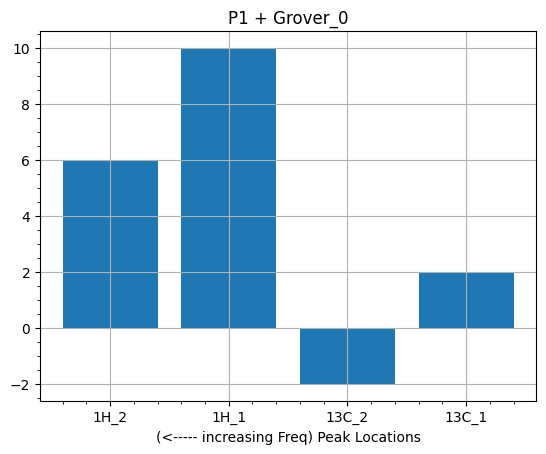

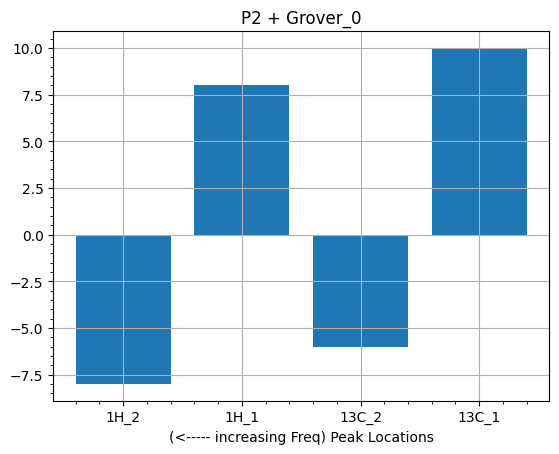

In [129]:
MultPlot(rho, [Grover('0'), ID, P0], True)
plt.grid(True)
plt.title('P0 + Grover_0')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('0'), ID, P1], True)
plt.grid(True)
plt.title('P1 + Grover_0')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('0'), ID, P2], True)
plt.grid(True)
plt.title('P2 + Grover_0')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()

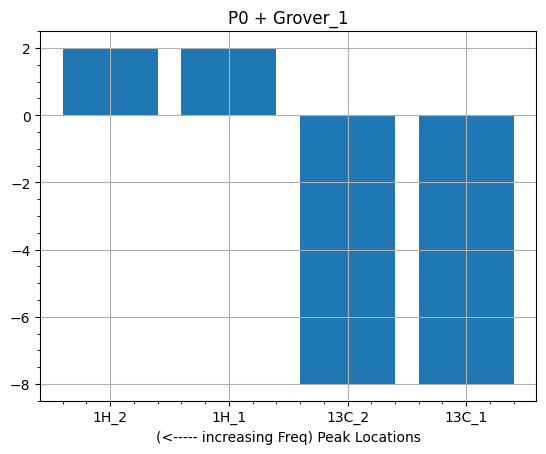

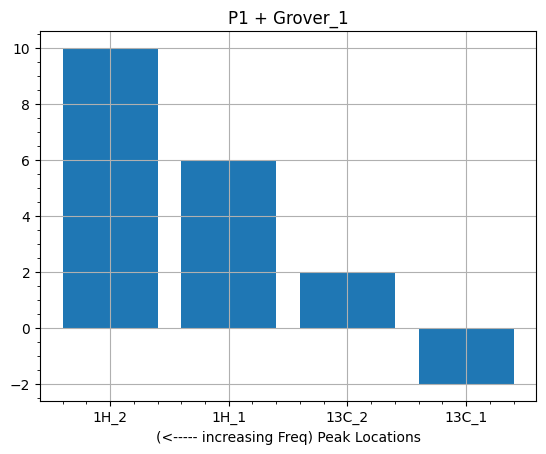

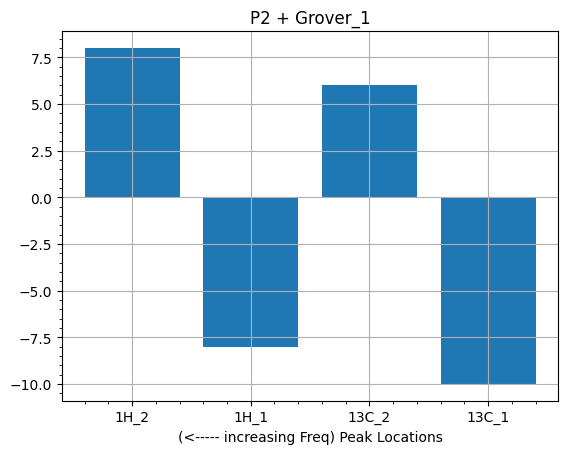

In [130]:
MultPlot(rho, [Grover('1'), ID, P0], True)
plt.grid(True)
plt.title('P0 + Grover_1')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('1'), ID, P1], True)
plt.grid(True)
plt.title('P1 + Grover_1')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('1'), ID, P2], True)
plt.grid(True)
plt.title('P2 + Grover_1')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()

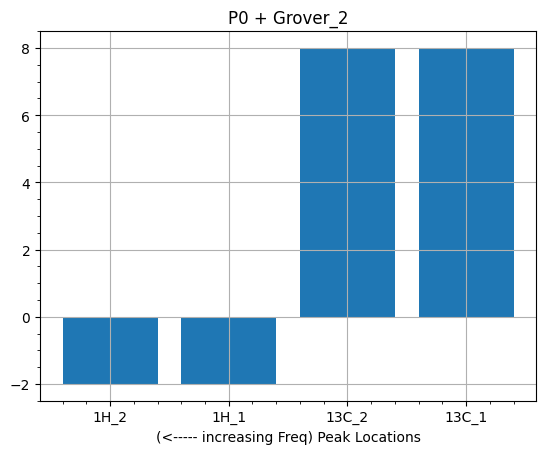

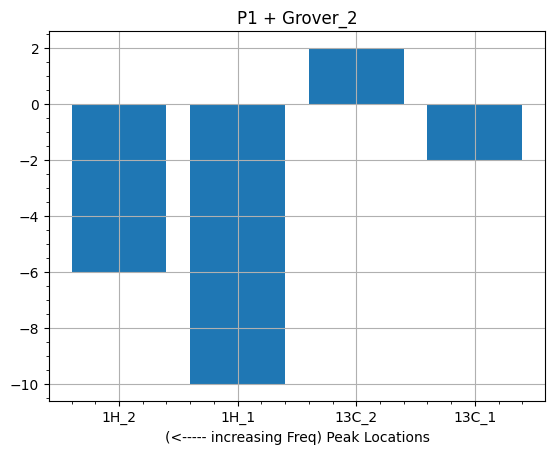

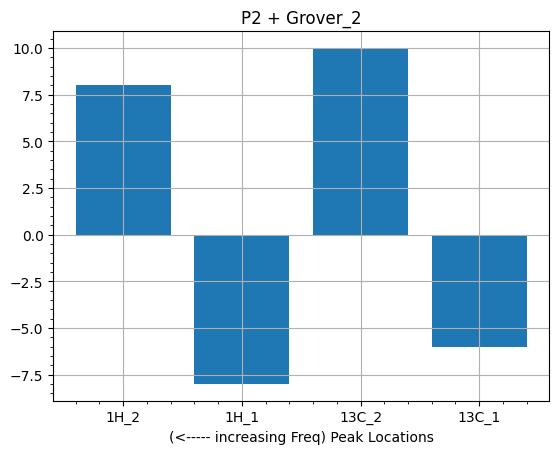

In [131]:
MultPlot(rho, [Grover('2'), ID, P0], True)
plt.grid(True)
plt.title('P0 + Grover_2')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('2'), ID, P1], True)
plt.grid(True)
plt.title('P1 + Grover_2')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('2'), ID, P2], True)
plt.grid(True)
plt.title('P2 + Grover_2')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()

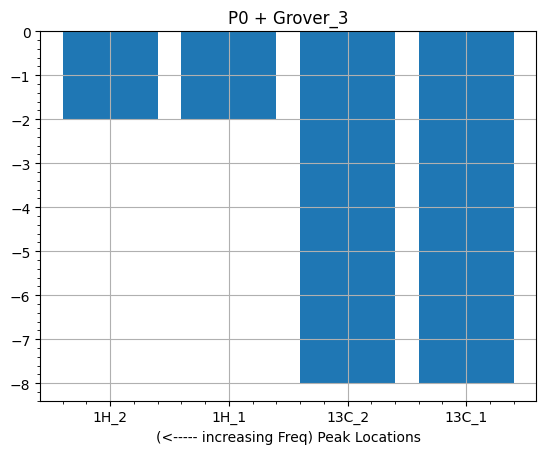

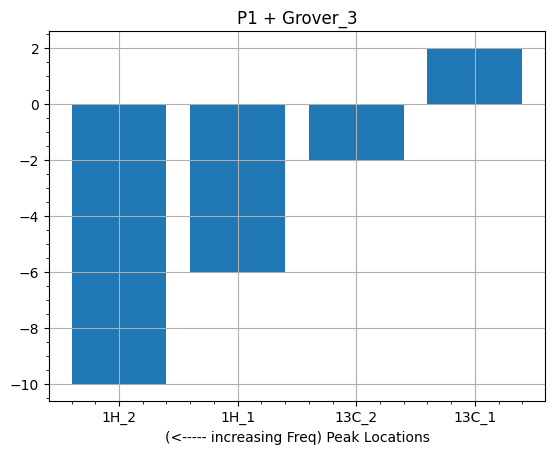

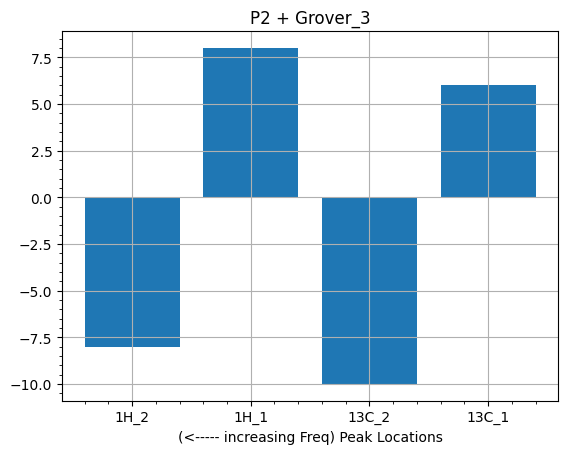

In [132]:
MultPlot(rho, [Grover('3'), ID, P0], True)
plt.grid(True)
plt.title('P0 + Grover_3')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('3'), ID, P1], True)
plt.grid(True)
plt.title('P1 + Grover_3')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()
MultPlot(rho, [Grover('3'), ID, P2], True)
plt.grid(True)
plt.title('P2 + Grover_3')
plt.xlabel('(<----- increasing Freq) Peak Locations')
plt.minorticks_on()
plt.show()

### 